<a href="https://colab.research.google.com/github/raularaju/TP1_MD/blob/main/C%C3%B3pia_de_TP1_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Raul Araju, Gabriel Lima
### **Matrículas**: 2021032110, 2021032048


### **Tema:** Conjuntos de músicas frequentes em playlists
### **Base de dados:** https://www.kaggle.com/datasets/siropo/spotify-multigenre-playlists-data


In [ ]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Bibliotecas usadas no projeto
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**2. Data understanding (Entendimento dos dados)**


In [ ]:
#Carregando a base de dados
alternative_df = pd.read_csv('/content/input/alternative_music_data.csv')
blues_df = pd.read_csv('/content/input/blues_music_data.csv')
hiphop_df = pd.read_csv('/content/input/hiphop_music_data.csv')
indie_df = pd.read_csv('/content/input/indie_alt_music_data.csv')
metal_df = pd.read_csv('/content/input/metal_music_data.csv')
pop_df = pd.read_csv('/content/input/pop_music_data.csv')
rock_df = pd.read_csv('/content/input/rock_music_data.csv')
arr_dfs =[alternative_df, blues_df, hiphop_df, indie_df, metal_df, pop_df, rock_df]
all_df = pd.concat(arr_dfs, axis = 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
all_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(26752, 22)

In [ ]:
all_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Artist Name', 'Track Name', 'Popularity', 'Genres', 'Playlist',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [ ]:
all_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


In [ ]:
all_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,26752.000000,2.675200e+04,26752.000000
mean,46.603544,0.551091,0.698948,5.299604,-7.231568,0.623131,0.085210,0.186927,0.110631,0.198308,0.493760,123.791402,2.316677e+05,3.936379
std,18.890180,0.166505,0.210743,3.566726,3.312386,0.484611,0.087807,0.265412,0.246161,0.156232,0.233485,29.365056,7.955645e+04,0.334642
min,0.000000,0.000000,0.000020,0.000000,-34.825000,0.000000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,1.379300e+04,0.000000
25%,34.000000,0.439000,0.558000,2.000000,-8.802000,0.000000,0.035800,0.002370,0.000000,0.097300,0.313000,100.017000,1.862860e+05,4.000000
50%,46.000000,0.550000,0.730000,5.000000,-6.599000,1.000000,0.050600,0.044450,0.000262,0.134000,0.490000,122.005000,2.176090e+05,4.000000
75%,60.000000,0.667000,0.877000,9.000000,-4.955000,1.000000,0.091300,0.285000,0.033400,0.267000,0.673000,143.373000,2.582270e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.960000,0.996000,0.996000,0.992000,0.986000,249.438000,1.561133e+06,5.000000


In [ ]:
all_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26752 entries, 0 to 8746
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       26752 non-null  object 
 1   Track Name        26752 non-null  object 
 2   Popularity        26752 non-null  int64  
 3   Genres            26752 non-null  object 
 4   Playlist          26752 non-null  object 
 5   danceability      26752 non-null  float64
 6   energy            26752 non-null  float64
 7   key               26752 non-null  int64  
 8   loudness          26752 non-null  float64
 9   mode              26752 non-null  int64  
 10  speechiness       26752 non-null  float64
 11  acousticness      26752 non-null  float64
 12  instrumentalness  26752 non-null  float64
 13  liveness          26752 non-null  float64
 14  valence           26752 non-null  float64
 15  tempo             26752 non-null  float64
 16  id                26752 non-null  object 

In [ ]:
null_counts = all_df.isnull().sum()
print(null_counts)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Artist Name         0
Track Name          0
Popularity          0
Genres              0
Playlist            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64


In [ ]:
all_df['Playlist'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


347

##**3. Data preparation (Preparação dos dados)**

In [ ]:
columns_to_keep = ['Artist Name', 'Track Name', 'Genres', 'Playlist']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for df in arr_dfs:
  columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
  df.drop(columns=columns_to_drop, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for dataframe in arr_dfs:
  print(dataframe['Playlist'].nunique())

25
39
43
55
34
63
119


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**4. Modeling (Modelagem)**

In [ ]:
def get_frequent_sets(df, column_name = 'Track Name', min_sup = 0.12):
    playlist_tracks = df.groupby('Playlist')[column_name].apply(list).tolist()
    te = TransactionEncoder()
    te_ary = te.fit(playlist_tracks).transform(playlist_tracks)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_encoded, min_support=min_sup, use_colnames=True)

    # Print frequent itemsets
    return frequent_itemsets.sort_values(by = 'support', ascending=False)

### 4.1 Modelagem para cojunto de artistas

1. Pegar os conjuntos frequentes para cada um dos datasets
2. Pegar as regras mais importantes de cada um desses conjuntos frequentes (com base nas métricas)
3. Analisar a presença do suporte de cada lado da regra
4. Pedir a opinião do chatGPT sobre as escolhas de análise e reportá-las




2. Checar se tem interseção de artistas entre datasets diferentes



1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [ ]:
freq_sets_artists = get_frequent_sets(rock_df, 'Artist Name', 0.07)
freq_sets_artists
#freq_sets_artists2=freq_sets_artists[freq_sets_artists['itemsets'].apply(lambda x: len(x) > 1)]
#print(freq_sets_artists.head(10).to_latex(index= False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
24,0.218487,(Foo Fighters)
62,0.184874,(Royal Blood)
47,0.176471,(Nirvana)
54,0.176471,(Pearl Jam)
88,0.176471,(U2)
...,...,...
118,0.075630,"(Led Zeppelin, Fleetwood Mac)"
183,0.075630,"(MOD SUN, grandson)"
182,0.075630,"(MOD SUN, Machine Gun Kelly)"
181,0.075630,"(Lenny Kravitz, U2)"


### Modelagem para conjunto de músicas

In [ ]:
freq_sets_tracks = get_frequent_sets(rock_df, 'Track Name', 0.05)
freq_sets_tracks2=freq_sets_tracks[freq_sets_tracks['itemsets'].apply(lambda x: len(x) > 1)]
print(freq_sets_tracks2.head(10).to_latex(index= False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-92-f8dab6c6a082>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(freq_sets_tracks2.head(10).to_latex(index= False))


\begin{tabular}{rl}
\toprule
 support &                                           itemsets \\
\midrule
 0.05042 &                     (Last Nite, Seven Nation Army) \\
 0.05042 &           (When You Were Young, hollywood sucks//) \\
 0.05042 & (Steady, As She Goes, Are You Gonna Be My Girl,... \\
 0.05042 & (hollywood sucks//, t r a n s p a r e n t s o u... \\
 0.05042 & (hollywood sucks//, love race (feat. Kellin Qui... \\
 0.05042 &                   (Take Me Out, Seven Nation Army) \\
 0.05042 &                  (Just Kidding, hollywood sucks//) \\
 0.05042 &                       (hollywood sucks//, Amnesia) \\
 0.05042 &      (Are You Gonna Be My Girl, Seven Nation Army) \\
 0.05042 &    (Steady, As She Goes, Are You Gonna Be My Girl) \\
\bottomrule
\end{tabular}



##**5. Evaluation (Validação)**


In [ ]:
def sort_rules(rules, metric, ascending = False):
  return rules.sort_values(by=
                           metric, ascending=False)

In [ ]:
columns_to_keep_rules = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 5.1 Validação para cojunto de artistas

In [ ]:
rules_artists = association_rules(freq_sets_artists, metric="confidence", min_threshold= 0.75)

NameError: ignored

In [ ]:
rules_sorted_by_lift_artists = sort_rules(rules_artists, 'lift')
rules_sorted_by_lift_artists[columns_to_keep_rules]
print(rules_sorted_by_lift_artists[columns_to_keep_rules].head(10).to_latex(index= False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


\begin{tabular}{llrrrr}
\toprule
                                       antecedents &                            consequents &  support &  confidence &      lift &  conviction \\
\midrule
            (Kings of Leon, The Smashing Pumpkins) &                (Foo Fighters, Incubus) &  0.07563 &    1.000000 & 10.818182 &         inf \\
                           (Foo Fighters, Incubus) & (Kings of Leon, The Smashing Pumpkins) &  0.07563 &    0.818182 & 10.818182 &    5.084034 \\
                          (Kings of Leon, Nirvana) &                (Foo Fighters, Incubus) &  0.07563 &    0.900000 &  9.736364 &    9.075630 \\
                           (Foo Fighters, Incubus) &               (Kings of Leon, Nirvana) &  0.07563 &    0.818182 &  9.736364 &    5.037815 \\
                                 (Franz Ferdinand) &                       (The Raconteurs) &  0.07563 &    0.900000 &  8.925000 &    8.991597 \\
                           (grandson, KennyHoopla) &                              

<ipython-input-96-d685cc962a94>:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(rules_sorted_by_lift_artists[columns_to_keep_rules].head(10).to_latex(index= False))


In [ ]:
rules_sorted_by_support_artists = sort_rules(rules_artists, 'support')
print(rules_sorted_by_support_artists[columns_to_keep_rules].head(10).to_latex(index= False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-97-69652c06da6d>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(rules_sorted_by_support_artists[columns_to_keep_rules].head(10).to_latex(index= False))


\begin{tabular}{llrrrr}
\toprule
                          antecedents &          consequents &  support &  confidence &     lift &  conviction \\
\midrule
                          (Pearl Jam) &       (Foo Fighters) & 0.134454 &    0.761905 & 3.487179 &    3.282353 \\
              (The Smashing Pumpkins) &            (Nirvana) & 0.126050 &    0.789474 & 4.473684 &    3.911765 \\
                       (Led Zeppelin) & (The Rolling Stones) & 0.117647 &    0.875000 & 5.784722 &    6.789916 \\
                 (The Rolling Stones) &       (Led Zeppelin) & 0.117647 &    0.777778 & 5.784722 &    3.894958 \\
                      (Kings of Leon) &       (Foo Fighters) & 0.117647 &    0.777778 & 3.559829 &    3.516807 \\
                (Stone Temple Pilots) &            (Nirvana) & 0.100840 &    0.800000 & 4.533333 &    4.117647 \\
                (Stone Temple Pilots) &       (Foo Fighters) & 0.100840 &    0.800000 & 3.661538 &    3.907563 \\
                            (MOD SUN) &       

In [ ]:
rules_sorted_by_confidence_artists= sort_rules(rules_artists, 'confidence')
print(rules_sorted_by_confidence_artists[columns_to_keep_rules].head(10).to_latex(index = False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-98-101e654f9b37>:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(rules_sorted_by_confidence_artists[columns_to_keep_rules].head(10).to_latex(index = False))


\begin{tabular}{llrrrr}
\toprule
                                       antecedents &          consequents &  support &  confidence &     lift &  conviction \\
\midrule
                                   (KID BRUNSWICK) &        (KennyHoopla) &  0.07563 &         1.0 & 7.437500 &         inf \\
                 (Kings of Leon, Nirvana, Incubus) &       (Foo Fighters) &  0.07563 &         1.0 & 4.576923 &         inf \\
            (Kings of Leon, The Smashing Pumpkins) &       (Foo Fighters) &  0.07563 &         1.0 & 4.576923 &         inf \\
            (Kings of Leon, Red Hot Chili Peppers) &       (Foo Fighters) &  0.07563 &         1.0 & 4.576923 &         inf \\
         (The Smashing Pumpkins, Nirvana, Incubus) &       (Foo Fighters) &  0.07563 &         1.0 & 4.576923 &         inf \\
                         (Aerosmith, Led Zeppelin) & (The Rolling Stones) &  0.07563 &         1.0 & 6.611111 &         inf \\
               (The Rolling Stones, Fleetwood Mac) &       (Led Zeppe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


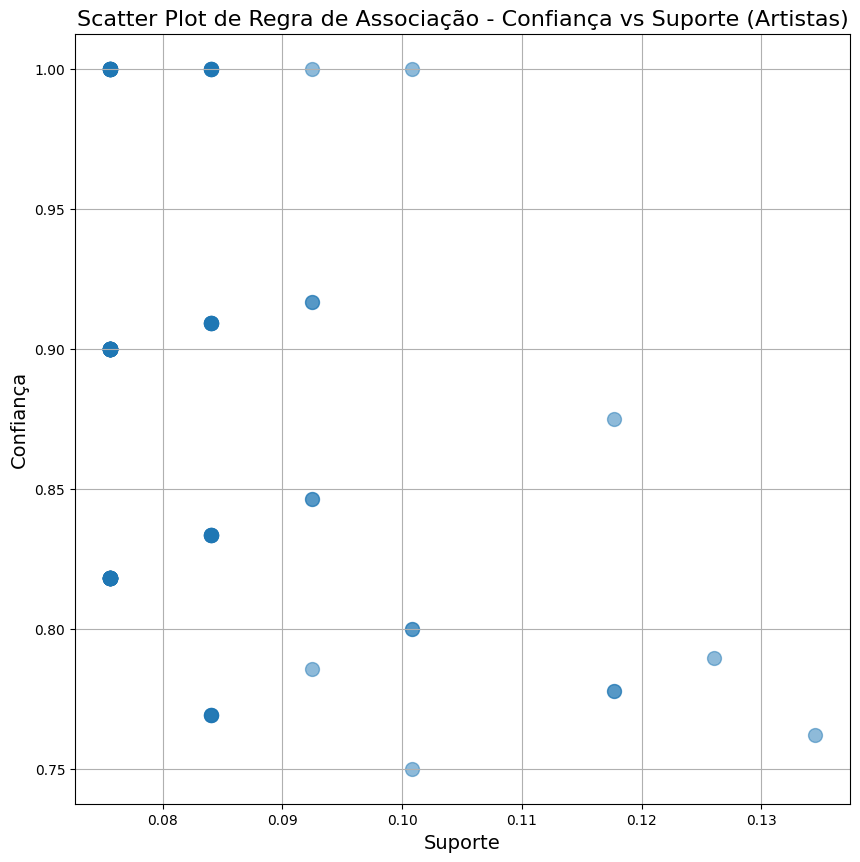

In [ ]:
# Extract the relevant columns from your DataFrame
confidence = rules_artists['confidence']
lift = rules_artists['lift']
support = rules_artists['support']
conviction = rules_artists['conviction']
# Optionally, you can add labels or tooltips for each point using 'antecedents' and 'consequents' columns
antecedents = rules_artists['antecedents']
consequents = rules_artists['consequents']
a =  np.random.randint(1, 301, size=100)
b =  np.random.randint(1, 301, size=100)
# Create a scatter plot
plt.figure(figsize=(10, 10))

# Add labels or tooltips for each point
plt.scatter(support, confidence, s=100, alpha=0.5)

# Label the axes
plt.xlabel('Suporte', fontsize=14)
plt.ylabel('Confiança', fontsize=14)

# Add a title
plt.title('Scatter Plot de Regra de Associação - Confiança vs Suporte (Artistas)', fontsize=16)

# Display the plot
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


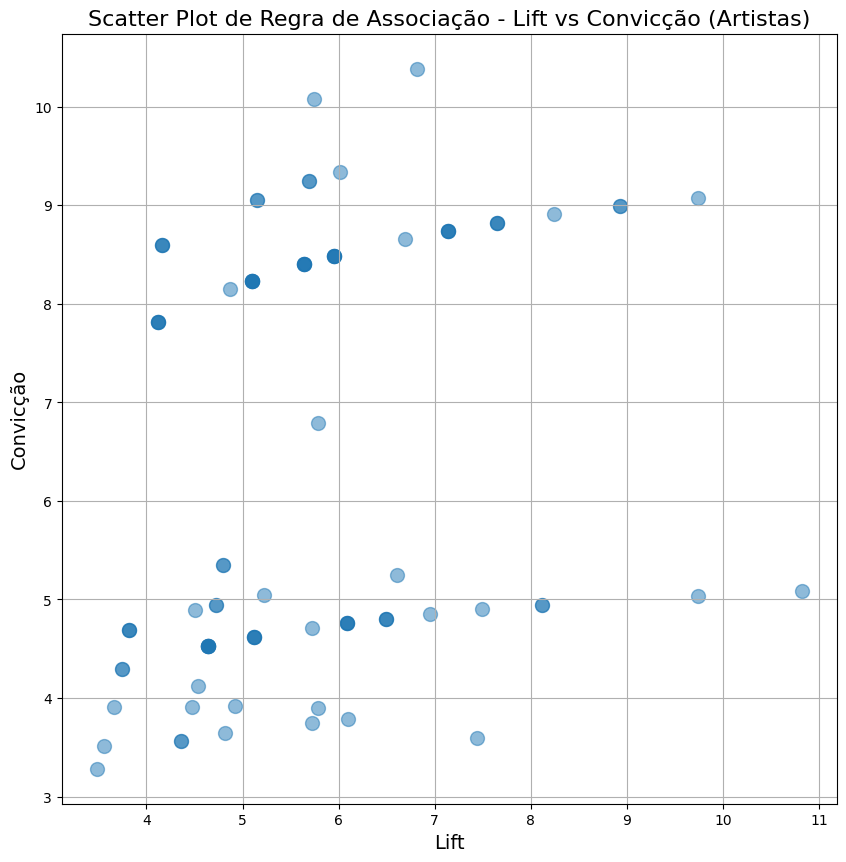

In [ ]:
# Extract the relevant columns from your DataFrame
confidence = rules_artists['confidence']
lift = rules_artists['lift']
support = rules_artists['support']
conviction = rules_artists['conviction']
# Optionally, you can add labels or tooltips for each point using 'antecedents' and 'consequents' columns
antecedents = rules_artists['antecedents']
consequents = rules_artists['consequents']
a =  np.random.randint(1, 301, size=100)
b =  np.random.randint(1, 301, size=100)
# Create a scatter plot
plt.figure(figsize=(10, 10))

# Add labels or tooltips for each point
plt.scatter(lift, conviction, s=100, alpha=0.5)

# Label the axes
plt.xlabel('Lift', fontsize=14)
plt.ylabel('Convicção', fontsize=14)

# Add a title
plt.title('Scatter Plot de Regra de Associação - Lift vs Convicção (Artistas)', fontsize=16)

# Display the plot
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


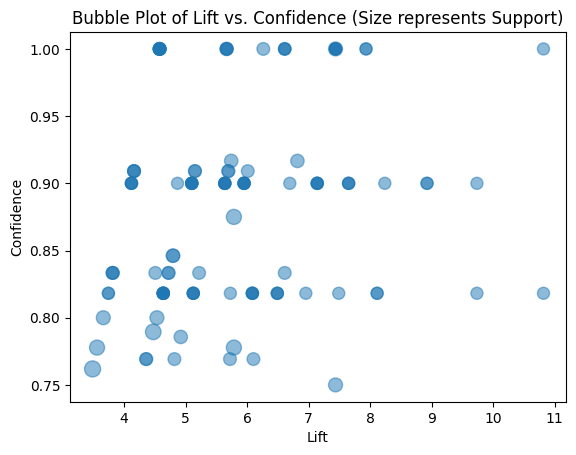

In [ ]:
plt.scatter(rules_artists['lift'], rules_artists['confidence'], s=rules_artists['support'] * 1000, alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Bubble Plot of Lift vs. Confidence (Size represents Support)')
plt.show()


### 5.2 Validação para conjunto de músicas

In [ ]:
rules_tracks = association_rules(freq_sets_tracks, metric="confidence", min_threshold= 0.75)
rules_tracks

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Last Nite),(Seven Nation Army),0.050420,0.084034,0.05042,1.000000,11.900000,0.046183,inf,0.964602
1,"(Steady, As She Goes, Are You Gonna Be My Girl)",(Seven Nation Army),0.050420,0.084034,0.05042,1.000000,11.900000,0.046183,inf,0.964602
2,"(Steady, As She Goes, Seven Nation Army)",(Are You Gonna Be My Girl),0.050420,0.050420,0.05042,1.000000,19.833333,0.047878,inf,1.000000
3,"(Seven Nation Army, Are You Gonna Be My Girl)","(Steady, As She Goes)",0.050420,0.050420,0.05042,1.000000,19.833333,0.047878,inf,1.000000
4,"(Steady, As She Goes)","(Seven Nation Army, Are You Gonna Be My Girl)",0.050420,0.050420,0.05042,1.000000,19.833333,0.047878,inf,1.000000
5,(Are You Gonna Be My Girl),"(Steady, As She Goes, Seven Nation Army)",0.050420,0.050420,0.05042,1.000000,19.833333,0.047878,inf,1.000000
6,(t r a n s p a r e n t s o u l feat. Travis Ba...,(hollywood sucks//),0.067227,0.084034,0.05042,0.750000,8.925000,0.044771,3.663866,0.951952
7,(love race (feat. Kellin Quinn)),(hollywood sucks//),0.050420,0.084034,0.05042,1.000000,11.900000,0.046183,inf,0.964602
8,(Take Me Out),(Seven Nation Army),0.058824,0.084034,0.05042,0.857143,10.200000,0.045477,6.411765,0.958333
9,(Just Kidding),(hollywood sucks//),0.058824,0.084034,0.05042,0.857143,10.200000,0.045477,6.411765,0.958333


In [ ]:
rules_sorted_by_lift_tracks = sort_rules(rules_tracks, 'lift')
rules_sorted_by_lift_tracks[columns_to_keep_rules]
#print(rules_sorted_by_lift_tracks[columns_to_keep_rules].head(10).to_latex(index= False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
13,(Are You Gonna Be My Girl),"(Steady, As She Goes)",0.05042,1.000000,19.833333,inf
12,"(Steady, As She Goes)",(Are You Gonna Be My Girl),0.05042,1.000000,19.833333,inf
2,"(Steady, As She Goes, Seven Nation Army)",(Are You Gonna Be My Girl),0.05042,1.000000,19.833333,inf
3,"(Seven Nation Army, Are You Gonna Be My Girl)","(Steady, As She Goes)",0.05042,1.000000,19.833333,inf
4,"(Steady, As She Goes)","(Seven Nation Army, Are You Gonna Be My Girl)",0.05042,1.000000,19.833333,inf
5,(Are You Gonna Be My Girl),"(Steady, As She Goes, Seven Nation Army)",0.05042,1.000000,19.833333,inf
24,(Hate To Say I Told You So),"(Seven Nation Army, Take Me Out)",0.05042,0.857143,17.000000,6.647059
23,"(Seven Nation Army, Take Me Out)",(Hate To Say I Told You So),0.05042,1.000000,17.000000,inf
22,"(Hate To Say I Told You So, Seven Nation Army)",(Take Me Out),0.05042,1.000000,17.000000,inf
25,(Take Me Out),"(Hate To Say I Told You So, Seven Nation Army)",0.05042,0.857143,17.000000,6.647059


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
